In [26]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Load dataset
penguins_df = pd.read_csv('penguins.csv')

In [3]:
# Explore dataset

In [4]:
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [6]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [7]:
# Check for missing data
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

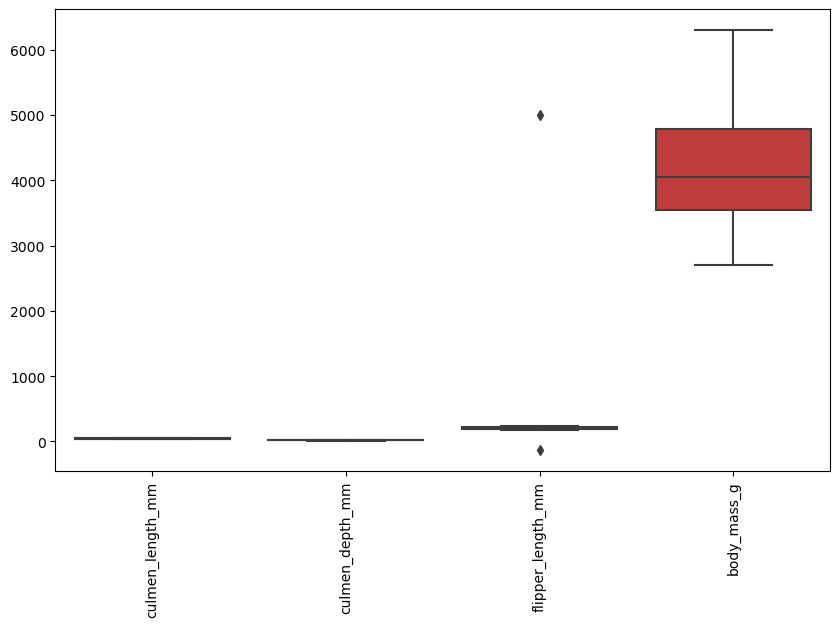

In [37]:
# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins_df)
plt.xticks(rotation=90)
plt.show()

In [12]:
# Remove missing data
penguins_df.dropna(axis=0, inplace=True)

In [13]:
# Remove outliers in flipper_length_mm
Q1 = penguins_df['flipper_length_mm'].quantile(0.25)
Q3 = penguins_df['flipper_length_mm'].quantile(0.75)
IQR = Q3 -Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

penguins_clean = penguins_df[(penguins_df["flipper_length_mm"] < upper_threshold) 
                             & (penguins_df["flipper_length_mm"] > lower_threshold)]

In [18]:
# Pre-process the data

In [20]:
## Use one-hot encoding to create dummy variables for feature 'sex'
penguins_onehot = pd.get_dummies(penguins_clean, columns=['sex'])
penguins_onehot = penguins_onehot.drop('sex_.', axis=1) # Remove the original categorical feature from the dataset

In [23]:
## Scale the data using the standard scaling method
scaler = StandardScaler()
scaler.fit(penguins_onehot)
penguins_preprocessed = scaler.transform(penguins_onehot)

In [28]:
# Perform PCA on the dataset to determine the desired number of components (n_components)
pca = PCA()
pca.fit(penguins_preprocessed)
print(pca.explained_variance_ratio_)

[0.51973484 0.34424041 0.08591863 0.03225427 0.01686049 0.00099136]


In [29]:
# We consider only components with an explained variance ratio above 10%
components = [i for i in pca.explained_variance_ratio_ if i > 0.10]
n_components = len(components)

In [30]:
# Perform PCA using the reduced number of components
pca_reduced = PCA(n_components=n_components)
pca_reduced.fit(penguins_preprocessed)
penguins_PCA = pca_reduced.transform(penguins_preprocessed)

C:\Users\XavierLerin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


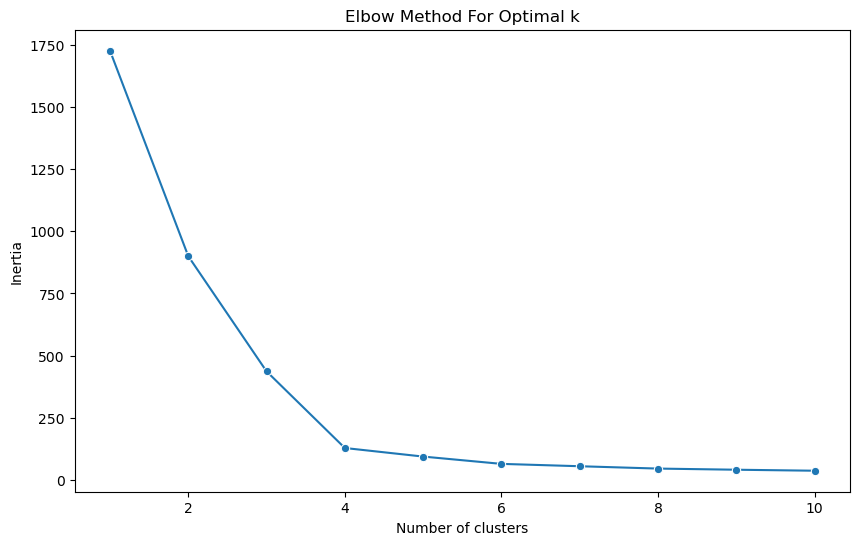

In [31]:
# Perform k-means clustering on the dataset and determine the number of clusters through elbow analysis
inertia = []
cluster_range = range (1,11)

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(penguins_PCA)
    inertia.append(model.inertia_)
    
plt.figure(figsize=(10, 6))
sns.lineplot(x=cluster_range, y=inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
# Save the optimal number of clusters in a variable
n_clusters = 4

In [35]:
# Run a new k-means cluster model based on the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(penguins_PCA)

KMeans(n_clusters=4, random_state=42)

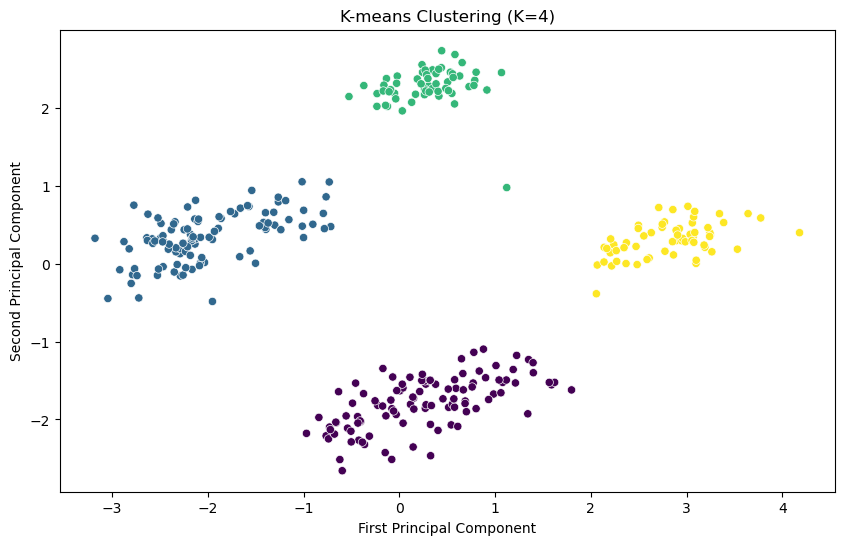

In [36]:
# Visualise clusters using the first two principle components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=penguins_PCA[:,0], y=penguins_PCA[:,1], c=kmeans.labels_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()